Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import glob
import os
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Loading MNIST Dataset

In [ ]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Function to Load Real-World Data

In [ ]:
# Function to load and preprocess images
def load_images_from_directory(directory_path, target_size=(28, 28)):
    images = []
    for file_path in sorted(glob.glob(f"{directory_path}/*.jpeg")):
        img = load_img(file_path, color_mode="grayscale", target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
    return np.array(images)


Loading Real World Examples

In [ ]:
# Update these paths based on Colab structure
x_train_real_path = '/content/TrainSet/X'
y_train_real_path = '/content/TrainSet/y'

# Load real-world dataset (images)
real_x_train = load_images_from_directory(x_train_real_path)
real_x_train = real_x_train.reshape(-1, 28, 28, 1)  # Add channel dimension

# Load real-world dataset (labels)
def load_labels_from_directory(directory_path):
    labels = []
    for file_path in sorted(glob.glob(f"{directory_path}/*.jpeg")):
        label = int(os.path.basename(file_path).split('_')[1].split('.')[0])  # Extract numeric label from filename
        labels.append(label)
    return np.array(labels)

real_y_train = load_labels_from_directory(y_train_real_path)
real_y_train = tf.keras.utils.to_categorical(real_y_train, num_classes=10)

# Combine datasets
x_train_combined = np.concatenate((x_train, real_x_train), axis=0)
y_train_combined = np.concatenate((y_train, real_y_train), axis=0)

#Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the Model
history = model.fit(x_train_combined, y_train_combined, epochs=5, batch_size=32, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9119 - loss: 0.2898 - val_accuracy: 0.9844 - val_loss: 0.0506
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9883 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.9880 - val_loss: 0.0364
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9914 - val_loss: 0.0291


Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


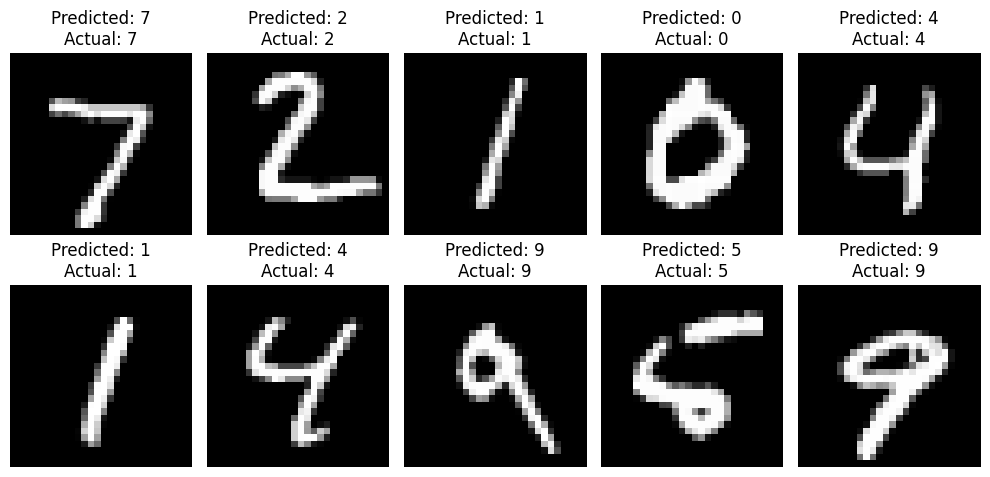

Model saved successfully!


In [ ]:
predictions = model.predict(x_test[:10])
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#saving the trained model
model.save('/content/check_recognition_model.h5')
print("Model saved successfully!")

Read New Check

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9078 - loss: 0.2950 - val_accuracy: 0.9846 - val_loss: 0.0459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9871 - val_loss: 0.0385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9912 - val_loss: 0.0260
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9894 - val_loss: 0.0365
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9881 - val_loss: 0.0389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


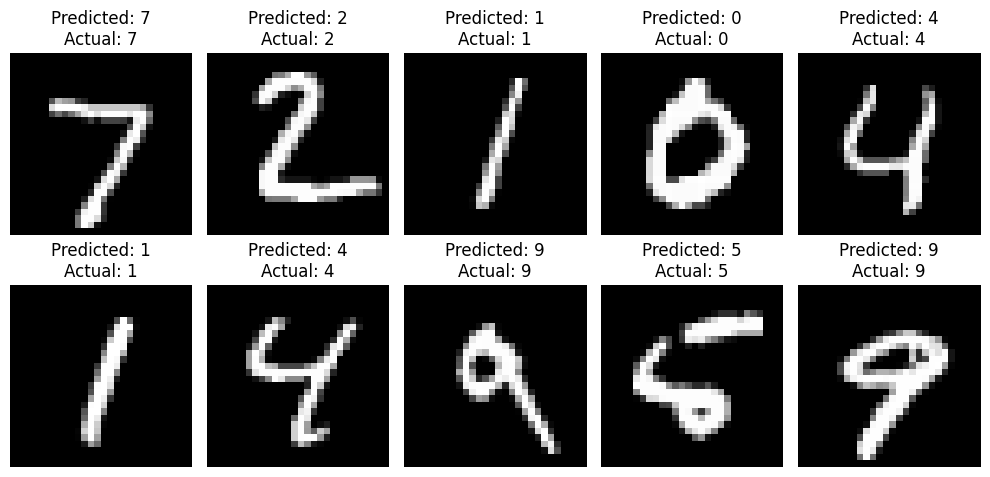

Model saved successfully!


In [ ]:
# prompt: fix this codes output, i need it to display the correct digits of the follwing images

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import glob
import os
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to load and preprocess images
def load_images_from_directory(directory_path, target_size=(28, 28)):
    images = []
    for file_path in sorted(glob.glob(f"{directory_path}/*.jpeg")):
        img = load_img(file_path, color_mode="grayscale", target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
    return np.array(images)

# Update these paths based on Colab structure
x_train_real_path = '/content/TrainSet/X'
y_train_real_path = '/content/TrainSet/y'

# Load real-world dataset (images)
real_x_train = load_images_from_directory(x_train_real_path)
real_x_train = real_x_train.reshape(-1, 28, 28, 1)  # Add channel dimension

# Load real-world dataset (labels)
def load_labels_from_directory(directory_path):
    labels = []
    for file_path in sorted(glob.glob(f"{directory_path}/*.jpeg")):
        # Extract numeric label from filename (assuming consistent naming)
        try:
            label = int(os.path.basename(file_path).split('_')[1].split('.')[0])
            labels.append(label)
        except (IndexError, ValueError):
            print(f"Warning: Could not extract label from filename: {file_path}. Skipping this file.")
    return np.array(labels)


real_y_train = load_labels_from_directory(y_train_real_path)
real_y_train = tf.keras.utils.to_categorical(real_y_train, num_classes=10)


# Handle potential size mismatch after removing invalid files
if len(real_x_train) != len(real_y_train):
    print("Warning: Number of images and labels do not match after processing. Adjusting sizes.")
    min_len = min(len(real_x_train), len(real_y_train))
    real_x_train = real_x_train[:min_len]
    real_y_train = real_y_train[:min_len]


# Combine datasets
x_train_combined = np.concatenate((x_train, real_x_train), axis=0)
y_train_combined = np.concatenate((y_train, real_y_train), axis=0)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(x_train_combined, y_train_combined, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Visualize Predictions
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Saving the trained model
model.save('/content/check_recognition_model.h5')
print("Model saved successfully!")